In [9]:
!pip install scikit-learn==0.23.2
from sklearn import svm, metrics
import pandas as pd
from sklearn import model_selection
import matplotlib.pyplot as plt
import graphviz
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import pickle
from keras.models import model_from_json
from sklearn.model_selection import learning_curve

In [15]:
def plot_auc_roc_curve(models, pos_label, X_test, skip=False):
    results = []
    for name, model in models.items():
        print(name)
        if skip and name=="ANN":
            val = model.predict_proba(X_test)
        else:
            val = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = metrics.roc_curve(y_test, val, pos_label=pos_label)
        auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, label=name + " AUC={:.2f}".format(auc))

    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="best")
    plt.show()

# Dataset 1 - Census Dataset Analysis

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator AdaBoostClassifier from version 0.22.2.post1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


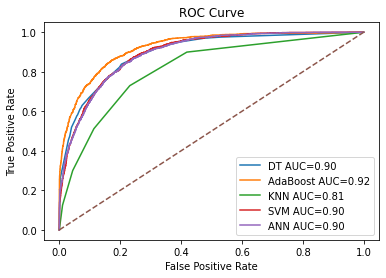

In [7]:
data = pd.read_csv("adult.data", sep='\t', header=None, 
                   names=["age", "workclass", "fnlwgt", "education", 
                          "education-num", "marital-status", "occupation",
                          "relationship", "race", "sex", "capital-gain", 
                          "capital-loss", "hours-per-week", "native-country", 
                          "output"])
categorical_vars =["workclass", "education", "marital-status", "occupation", "relationship", 
                   "race", "sex", "native-country"]
df = data.copy()
for var in categorical_vars:
    df[var] = pd.Categorical(df[var])
    df[var] = df[var].cat.codes

continuous_vars = ["fnlwgt", "capital-gain", "capital-loss"]
for var in continuous_vars:
    df[var] = (df[var]-df[var].mean())/df[var].std()

y = df.output.values
X = df.drop(['output'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

dt = pickle.load( open( "Decision Tree Post Pruned.sav", "rb" ) )
boost = pickle.load(open("Boost D1.sav", "rb"))
knn = pickle.load(open("KNN K=5 dataset1.sav", "rb"))
svm = pickle.load(open("RBF D1.sav", "rb"))

json_file = open('model D1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model D1.h5")

plot_auc_roc_curve({"DT": dt, "AdaBoost": boost, "KNN": knn, "SVM":svm, "ANN": loaded_model}, " >50K", X_test)

# Dataset 2 - Phishing Website Dataset Analysis


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 0.22. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.2.post1 when using version 0.22. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator AdaBoostClassifier from version 0.22.2.post1 when using version 0.22. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version 0.23.2 when using version 0.22. This might lead to breaking code or invalid 

DT
AdaBoost
KNN
SVM
ANN


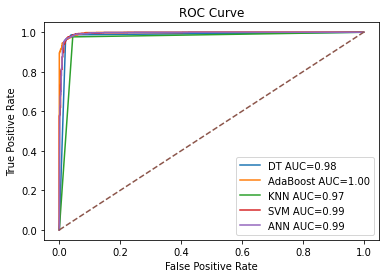

In [16]:
from scipy.io.arff import loadarff 

raw_data = loadarff('Training Dataset.arff')
ph_data = pd.DataFrame(raw_data[0])
ph_data.head()

for var in ph_data.columns.values:
    ph_data[var] = pd.Categorical(ph_data[var])
    ph_data[var] = ph_data[var].cat.codes

y = ph_data.Result.values
X = ph_data.drop(['Result'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

dt = pickle.load( open( "Decision Tree Max Depth Dataset 2.sav", "rb" ) )
boost = pickle.load(open("Boost D2.sav", "rb"))
knn = pickle.load(open("KNN K=1 dataset2.sav", "rb"))
svm = pickle.load(open("RBF D2.sav", "rb"))

json_file = open('model D2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model D2.h5")

plot_auc_roc_curve({"DT": dt, "AdaBoost": boost, "KNN": knn, "SVM":svm, "ANN": loaded_model}, 1, X_test, skip=True)